# Iris Data Set

url = https://archive.ics.uci.edu/ml/datasets/Iris

### Understanding the Question

The Iris data set contains 4 features (sepal length, sepal width, petal length, petal width).  From these feautres we will try to predict which class of Iris (Iris Setosa, Iris Versicolour, Iris Virginica) the given sample belongs to.  We have labels for our data and we are trying to predict the class our data belongs to.  This is a supervised (have target labels) classification (predicting a class or type) problem.

### Getting Started

In [1]:
import pandas as pd
import matplotlib as plt

### Load & Explore Data
Here we will load the data directly from the UCI Machine Learning Repo.  The list of names we pass are the column names and can be found by visiting the url of the dataset and viewing the 'Data Set Description'.  From this description we also see that there are 150 instances with 50 belonging to each of the 3 classes.

In [2]:
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_full_dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=col_names)

Let's preview the data now to make sure everything was loaded properly.

In [3]:
iris_full_dataset.shape

(150, 5)

Looks good, we were expecting 150 rows of data with 4 columns as features and 1 column as the label.  Let's continue to explore the data a bit more.

In [4]:
iris_full_dataset.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object

In [5]:
iris_full_dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris_full_dataset.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
iris_full_dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris_full_dataset['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

### Visualize the Data

Pandas has a lot of built in plot functions.  Let's play around with that and plot the data set in a few different ways.  At this point we are still just exploring our data.

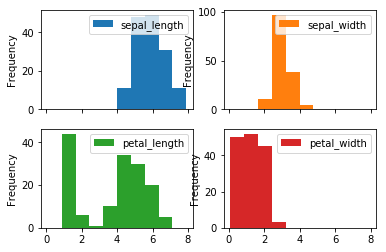

In [12]:
%matplotlib inline
iris_full_dataset.plot(kind='hist', layout=(2,2), subplots=True);

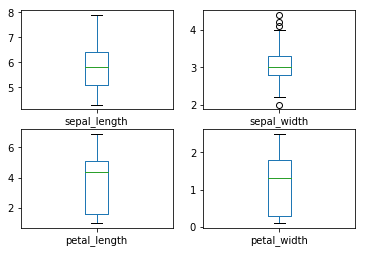

In [13]:
iris_full_dataset.plot(kind='box', layout=(2,2), subplots=True);

The plots above view the attributes of the entire dataset.  This can give you a rough idea of how the data for each variable is distributed.  Another way this could be useful is if we split the data set by class and looked at each variable's distribution above for each class.  I am not going to show that here but that could be a simple way to get an idea of what variables are significant in predicting the class.

To check out how different variables might correlate with one another we can used the scatter_matrix

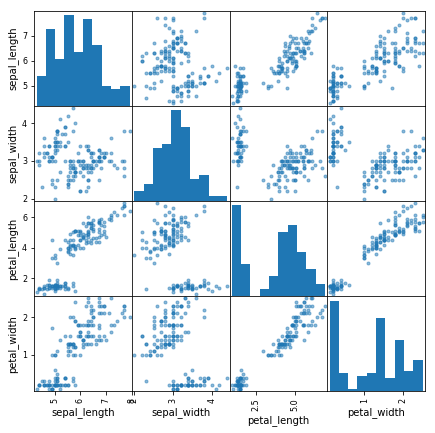

In [14]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(iris_full_dataset, figsize=(7,7));

### Prepare Data for ML Algorithms

The Iris dataset is mostly numerical so there isn't too much that needs to be done in preparing the data for our ML algorithms.  One thing we will need to do is split the full data set into training and testing sets.

This code below is getting an ndarray of our data from the dataset.  The selector at the end is saying [get all rows, get colums 0,1,2,3] for X and then [get all rows, get column 4] for Y.  X is the array of our features, and Y the array of labels.

In [16]:
#Get the values from our dataframe as array of data
X = iris_full_dataset.values[:,0:4]
Y = iris_full_dataset.values[:, 4]

In [17]:
#Split into train and test set
from sklearn import model_selection

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.3)

In [18]:
#Quick verify train, test split
print len(X_train)
print len(Y_train)
print len(X_test)
print len(Y_test)

105
105
45
45


### Build & Test Models

Now we will build and test various models using our train and test set.  Note that the results provided by cross_val_score() are the accuracy measure of each of the 10 different splits from our kfolds cross validation.  What this means is each score is the result of training on 9 random slices and testing on the remaining slice.

#### KNN Model

In [20]:
from sklearn.neighbors import KNeighborsClassifier

#Initialize Model
knn_model = KNeighborsClassifier()
#Create cross validation generator
kfold = model_selection.KFold(n_splits=10)
#Train & Test model
cross_val_results = model_selection.cross_val_score(knn_model, X_train, Y_train, cv=kfold, scoring='accuracy')
print cross_val_results.mean()

0.980909090909


#### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

#Initialize Model
log_reg_model = LogisticRegression()
#Create cross validation generator
kfold = model_selection.KFold(n_splits=10)
#Train & Test model
cross_val_results = model_selection.cross_val_score(log_reg_model, X_train, Y_train, cv=kfold, scoring='accuracy')
print cross_val_results.mean()

0.924545454545


#### Support Vector Machine

In [22]:
from sklearn.svm import SVC

#Initialize Model
svm_model = SVC()
#Create cross validation generator
kfold = model_selection.KFold(n_splits=10)
#Train & Test model
cross_val_results = model_selection.cross_val_score(svm_model, X_train, Y_train, cv=kfold, scoring='accuracy')
print cross_val_results.mean()

0.970909090909


#### Random Forest (Ensemble Learner)

In [24]:
from sklearn.ensemble import RandomForestClassifier

#Initialize Model
rf = RandomForestClassifier()
#Create cross validation generator
kfold = model_selection.KFold(n_splits=10)
#Train & Test model
cross_val_results = model_selection.cross_val_score(rf, X_train, Y_train, cv=kfold, scoring='accuracy')
print cross_val_results.mean()

0.951818181818


### Take Best Model & Make Predictions

KNN had the highest accuracy during this quick test.  We will now train a KNN model and use it to make predictions on our test set.

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#Initialize the KNN Model
knn = KNeighborsClassifier()
#Train the model
knn.fit(X_train, Y_train)
#Test the model
predictions = knn.predict(X_test)
print accuracy_score(Y_test, predictions)
print classification_report(Y_test, predictions)

0.955555555556
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.93      0.93      0.93        15

    avg / total       0.96      0.96      0.96        45



### Results

Our KNN model has a 96% accuracy when predicting our test set.  

This was done with the default parameters given by sklearn.  Some parameters for the KNN model that can be changed would be n_neighbors (default = 5), the weight function, or the algorithm used to compute the nearest neighbors.

### End

Thanks for checking out this notebook.  I used a variety of sources while working through the Iris data set as it is a very common machine learning introduction.  My two main sources for help were the [Scikit-learn Documentation](http://scikit-learn.org/stable/documentation.html) and this [Machine Learning Mastery Tutorial](http://machinelearningmastery.com/machine-learning-in-python-step-by-step/)